## CS530 Data Mining Homework 5

#### Question 1 (3 points): The Iris Dataset 

Load the Iris dataset using “datasets.load_iris()” from the Scikit-learn library. You can find the documentation of this dataset on Scikit-learn. Then write a function that takes in two inputs:
1.	The data part of the Iris set **without** the labels
2.	k, the number of clusters

The function should implement the k-means algorithm as learned in class. Hence, the output of the function should be a list of cluster labels for each record of the Iris dataset, from 1 to k. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
iris = load_iris()
X = iris.data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
def distance(a, b):
  return (sum((a-b)**2))**0.5

def get_centroids(X, cluster_labels, k):
  centroids = []
  for i in range(k):
    centroids.append(X[np.where(cluster_labels==i)].mean(axis=0))
  return centroids

def get_labels(X, centroids, k):
  cluster_labels = np.zeros(X.shape[0],dtype=int)
  for i in range(X.shape[0]):
    min_dist = distance(X[i],centroids[0])
    min_centroid = 0
    for j in range(1,k):
      dist = distance(X[i],centroids[j])
      if dist < min_dist:
        min_dist = dist
        min_centroid = j
      if dist == min_dist:
        min_centroid = np.random.choice([j,min_centroid])
    cluster_labels[i] = min_centroid
  return cluster_labels

def k_means(X, k=3, max_iter = 100):
  cluster_labels = np.random.randint(low=0,high=k,size=X.shape[0])
  centroids = get_centroids(X, cluster_labels, k)
  convergence = False
  i=0
  while not convergence and i < max_iter:
    cluster_labels = get_labels(X, centroids, k)
    new_centroids = get_centroids(X, cluster_labels, k)
    if np.array_equal(centroids, new_centroids):
      convergence = True
    centroids = new_centroids
    i = i+1
  return cluster_labels

In [6]:
km_labels = k_means(X)

Question 2 (4 points)


a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.  To create your silhouette plots read the documentation, study the code, and implement on your own analysis using the outputs from Scikit-learn. 

Silhouette plot documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py 


Silhouette for 2 clusters:  0.681046169211746


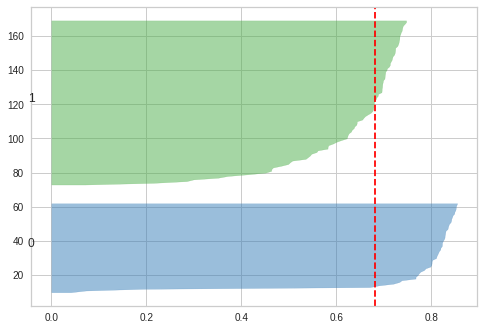

In [ ]:
km = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)
cluster_labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette for 2 clusters: ", silhouette_avg)

Silhouette for 3 clusters:  0.5528190123564091


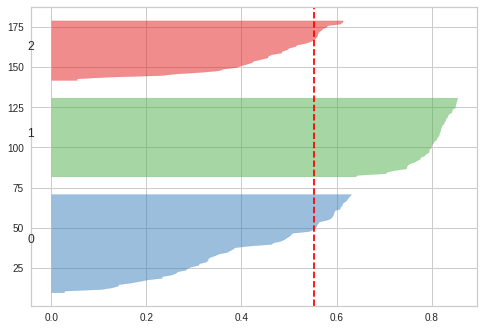

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)
cluster_labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette for 3 clusters: ", silhouette_avg)

Silhouette for 4 clusters:  0.4980505049972867


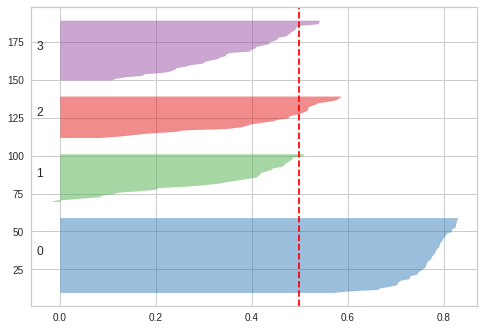

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)
cluster_labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette for 4 clusters: ", silhouette_avg)

Silhouette for 5 clusters:  0.4887488870931048


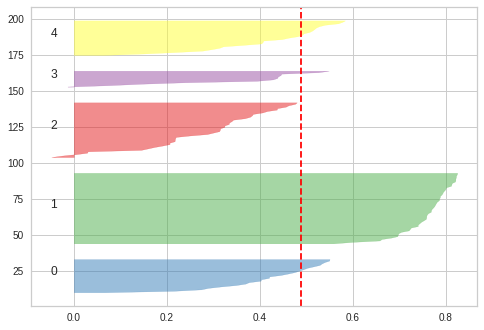

In [ ]:
km = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)
cluster_labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette for 5 clusters: ", silhouette_avg)

Silhouette for 6 clusters:  0.3648340039670018


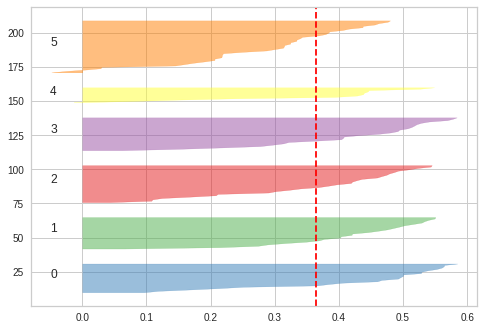

In [ ]:
km = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)
cluster_labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette for 6 clusters: ", silhouette_avg)

The optimal k value is either 2 or 3 since they had the highest average silhouette scores. Furthermore, their graphs looked well distributed unlike k values 4-6.

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
km_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

The labels are very close but not exactly the same. Specifically, the algorithm appears to do fairly well when predicting "0" but is a little more mixed when predicting "1" and "2". The main reason for this is because K-means clustering assumes that data points are related by their relative distance. Quite obviously this is not always the case and any outliers of the true cluster will be mislabeled. Additionally, labels 1 and 2 could spatially be very close together making it harder to distinguish one from the other. Furthermore, since this is an unsupervised machine learning algorithm, the true label is unknown meaning it cannot use this information to better predict the true labels. As such, this can lead to larger errors compared with supervised learning algorithms.

c. Look at the hierarchical clustering documentation for scipy. Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

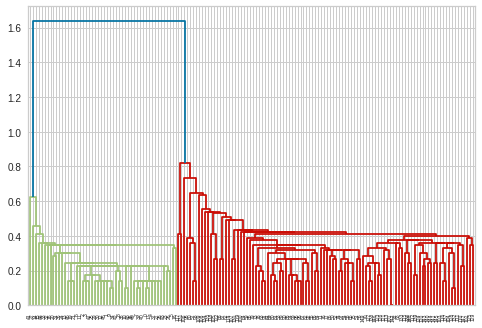

In [ ]:
linked = linkage(X, 'single')
dendrogram(linked)
plt.show()

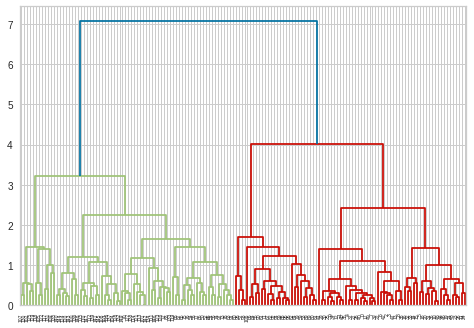

In [ ]:
linked = linkage(X, 'complete')
dendrogram(linked)
plt.show()

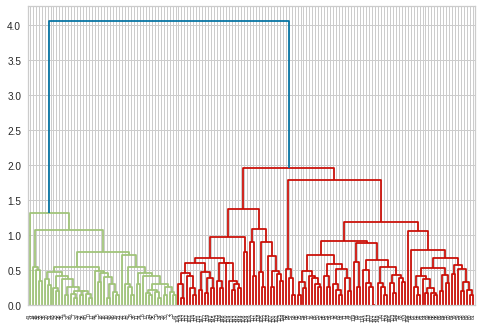

In [ ]:
linked = linkage(X, 'average')
dendrogram(linked)
plt.show()

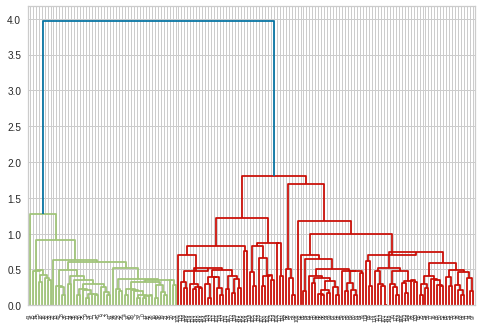

In [ ]:
linked = linkage(X, 'centroid')
dendrogram(linked)
plt.show()

d. Look at the dendrograms more closely and explain the difference between each linkage method.


Single: Had the smallest distances for when clusters formed. This makes sense since the method forms links based on the closest distance between clusters. As such, it forms links fairly quickly relative to distance. 

Complete: Had the largest distances for when clusters formed. Since the method forms links based on the farthest distance between clusters, it forms links slowly relative to distance.

Average: Forms clusters based on the average distances between points. The dendrogram appears to indicate that the clusters stack in a more symmetric fashion.

Centroid: The method forms links based on the distances between the centroids of the cluster. Most notably, there appears to be a few cases of inversion in the dendrogram as a consequence of using this method.

e. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
linked = linkage(X, 'average')
cut = fcluster(linked, 1.8, criterion="distance")-1
cut

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Like before as with k-means, hierarchical clustering performed fairly well. I decided to use 3 clusters and average linkage because it seemed to perform well against the true labels. Again the differences between the predicted labels and the true labels can be explained due to the fact that the algorithm performs under the assumption that the data points are clustered together by distance. As with most clustering techniques, it will not work for  outliers and it can be difficult to cluster when multiple labels are mixed together relative to their proximities such as the case with labels 1 and 2.